#  **MINI PROJECT**


---
---

##### **IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # using accuacy_score to find the accuarcy score of the model
from sklearn.metrics import confusion_matrix # using confusion matrix to evaluate te performance of the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

##### **LOADING DATASET**

In [2]:
z = pd.read_csv("survey lung cancer.csv")
df = z.drop("GENDER",axis=1)

In [3]:
z

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
k = (z["LUNG_CANCER"]=="YES").sum()
print(f"NUMBER OF PEOPLES WITH LUNG CANCER = {k}")

NUMBER OF PEOPLES WITH LUNG CANCER = 270


In [5]:
(z["LUNG_CANCER"]=="NO").sum()
print(f"NUMBER OF PEOPLES  LUNG CANCER = {k}")

NUMBER OF PEOPLES  LUNG CANCER = 270


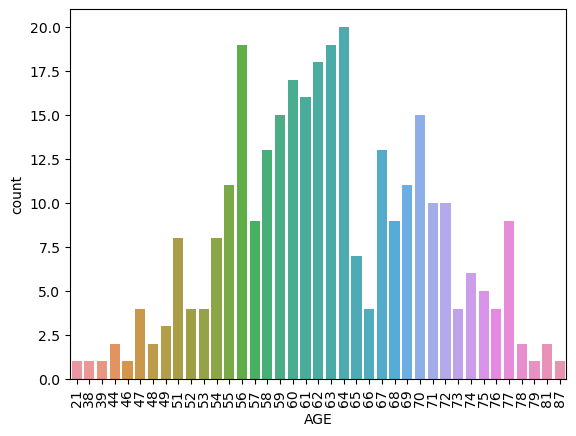

In [6]:
sns.countplot(x=z["AGE"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='GENDER', ylabel='SMOKING'>

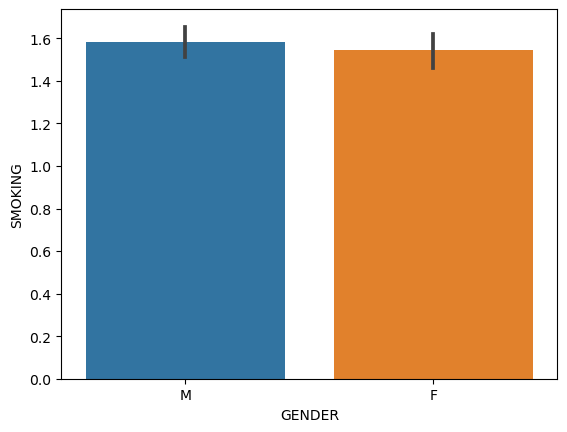

In [7]:
sns.barplot(x="GENDER",y="SMOKING",data=z)

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

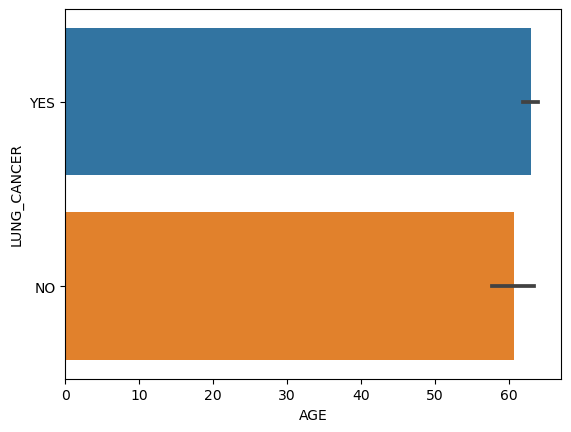

In [8]:
sns.barplot(x="AGE",y="LUNG_CANCER",data=z)

In [9]:
df 

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


---

##### Checking if their any null values in dataset

In [10]:
df.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

##### Splitting dataset to 'Features'(x) and 'Target'(y)

In [11]:
x = df.drop("LUNG_CANCER",axis=1)
y = df["LUNG_CANCER"]

#### Spilitting 'x' and 'y' to train and test data 

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=40,random_state=42)

In [13]:
x_train

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
42,77,1,2,2,2,2,2,1,2,2,1,1,1,1
24,72,2,2,2,2,2,1,2,2,2,2,1,2,2
179,72,2,2,2,2,1,2,1,2,1,2,2,2,1
242,77,2,2,2,1,2,1,2,2,1,1,1,2,2
297,47,2,2,1,2,2,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,65,2,2,2,2,2,1,1,1,1,1,1,1,1
71,66,2,2,2,2,1,2,1,2,1,2,2,2,1
106,61,2,2,2,2,2,2,1,1,1,1,2,2,1
270,70,2,1,1,1,1,2,1,1,1,1,2,1,1


In [14]:
y_train

42     YES
24     YES
179    YES
242    YES
297    YES
      ... 
188    YES
71     YES
106    YES
270     NO
102    YES
Name: LUNG_CANCER, Length: 269, dtype: object

In [15]:
x_test

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
288,61,1,2,2,2,1,1,2,2,1,2,1,2,1
9,53,2,2,2,2,2,1,2,1,2,1,1,2,2
57,73,1,1,1,1,2,1,2,1,2,2,2,2,2
60,70,1,2,1,2,2,2,2,2,2,2,1,2,2
25,65,1,2,2,1,1,2,1,2,2,2,2,2,2
63,68,1,1,2,1,2,1,2,2,2,1,1,2,1
92,52,2,1,1,1,2,2,2,2,2,1,1,2,2
184,72,2,1,1,1,1,2,2,2,2,2,2,1,2
244,64,2,2,2,1,1,2,2,1,1,1,2,1,2
46,62,2,2,1,1,2,1,2,1,1,2,2,2,2


In [16]:
y_test

288    YES
9      YES
57     YES
60     YES
25     YES
63     YES
92     YES
184    YES
244    YES
46     YES
75     YES
163    YES
295    YES
306    YES
284    YES
289    YES
5      YES
155    YES
164    YES
168    YES
73     YES
104    YES
137    YES
206    YES
76     YES
173    YES
113    YES
33     YES
274    YES
251    YES
108    YES
3       NO
82     YES
259    YES
93     YES
101    YES
45     YES
17     YES
197    YES
119    YES
Name: LUNG_CANCER, dtype: object

---

## LOGISTIC REGRESSION

In [17]:
LG = LogisticRegression() # creating an instance of the LogisticRegression class

In [18]:
LG.fit(x_train,y_train) # training the model 

C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
lg_pred = LG.predict(x_test) # making predictions using 'x_test' values

In [20]:
lg_accuracy = accuracy_score(y_test,lg_pred) # finding accuracy score of the model

In [21]:
print("Accuracy Score - Logistic Regression = ",lg_accuracy)

Accuracy Score - Logistic Regression =  0.95


In [22]:
lg_input = [[61,1,2,2,2,1,1,2,2,1,2,1,2,1]]
status = LG.predict(lg_input)
if status=="NO":
    print("NO LUNG CANCER")
else:
    print("GOT LUNG CANCER")

GOT LUNG CANCER


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
cm = confusion_matrix(y_test,lg_pred)
cm

array([[ 0,  1],
       [ 1, 38]], dtype=int64)

---

## SUPPORT VECTOR CLASSIFIER

In [24]:
svc = SVC(kernel="linear") # creating an instance of the Support Vector Classification class

In [25]:
svc.fit(x_train,y_train) # training the model 

SVC(kernel='linear')

In [26]:
svc_pred = svc.predict(x_test)

In [27]:
svc_accuracy = accuracy_score(y_test,svc_pred)

In [28]:
print("Accuracy Score - SVC = ",svc_accuracy)

Accuracy Score - SVC =  0.95


In [29]:
lg_input = [[61,1,2,2,2,1,1,2,2,1,2,1,2,1]]
status = LG.predict(lg_input)
if status=="NO":
    print("NO LUNG CANCER")
else:
    print("GOT LUNG CANCER")

GOT LUNG CANCER


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
cm = confusion_matrix(y_test,svc_pred)
cm

array([[ 0,  1],
       [ 1, 38]], dtype=int64)

---

## DECISION TREE CLASSIFIER

In [31]:
DTC = DecisionTreeClassifier() # creating an instance of the Decision Tree class

In [32]:
DTC.fit(x_train,y_train) # training the model 

DecisionTreeClassifier()

In [33]:
dtc_pred = DTC.predict(x_test)

In [34]:
dtc_accuracy = accuracy_score(y_test,dtc_pred)

In [35]:
print("Accuracy Score - Decision Tree Classifier = ",dtc_accuracy)

Accuracy Score - Decision Tree Classifier =  0.975


In [36]:
lg_input = [[63,1,2,1,1,1,1,1,2,1,2,2,1,1]]
status = LG.predict(lg_input)
if status=="NO":
    print("NO LUNG CANCER")
else:
    print("GOT LUNG CANCER")

NO LUNG CANCER


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
cm = confusion_matrix(y_test,dtc_pred)
cm

array([[ 0,  1],
       [ 0, 39]], dtype=int64)

---

## RANDOM FOREST CLASSIFIER

In [38]:
RFC = RandomForestClassifier(n_estimators=7) # creating an instance of Random Forest class

In [39]:
RFC.fit(x_train,y_train) # training the model 

RandomForestClassifier(n_estimators=7)

In [40]:
rfc_pred = RFC.predict(x_test)

In [41]:
rfc_accuracy = accuracy_score(y_test,rfc_pred)

In [42]:
print("Accuracy Score Random Forest Classifier = ",rfc_accuracy)

Accuracy Score Random Forest Classifier =  0.95


In [43]:
lg_input = [[61,1,2,2,2,1,1,2,2,1,2,1,2,1]]
status = LG.predict(lg_input)
if status=="NO":
    print("NO LUNG CANCER")
else:
    print("GOT LUNG CANCER")

GOT LUNG CANCER


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
cm = confusion_matrix(y_test,rfc_pred)
cm

array([[ 0,  1],
       [ 1, 38]], dtype=int64)

---

## NAIVE BAYES CLASSIFIER

In [45]:
NB = GaussianNB() # creating an instance of the GaussianNB class

In [46]:
NB.fit(x_train,y_train) # training the model 

GaussianNB()

In [47]:
nb_pred = NB.predict(x_test)

In [48]:
nb_accuracy = accuracy_score(y_test,nb_pred)

In [49]:
print("Accuracy Score - Naive Bayes Classifier = ",nb_accuracy)

Accuracy Score - Naive Bayes Classifier =  0.925


In [50]:
lg_input = [[63,1,2,1,1,1,1,1,2,1,2,2,1,1]]
status = LG.predict(lg_input)
if status=="NO":
    print("NO LUNG CANCER")
else:
    print("GOT LUNG CANCER")

NO LUNG CANCER


C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
cm = confusion_matrix(y_test,nb_pred)
cm

array([[ 0,  1],
       [ 2, 37]], dtype=int64)

---
---

## MODEL COMPARISON AND VISUALISATION

                    ML MODELS  ACCURACY SCORE
2    DECISION TREE CLASSIFIER           0.975
0         LOGISTIC REGRESSION           0.950
1  SUPPPORT VECTOR CLASSIFIER           0.950
3    RANDOM FOREST CLASSIFIER           0.950
4                 NAIVE BAYES           0.925


<Axes: xlabel='ML MODELS', ylabel='ACCURACY SCORE'>

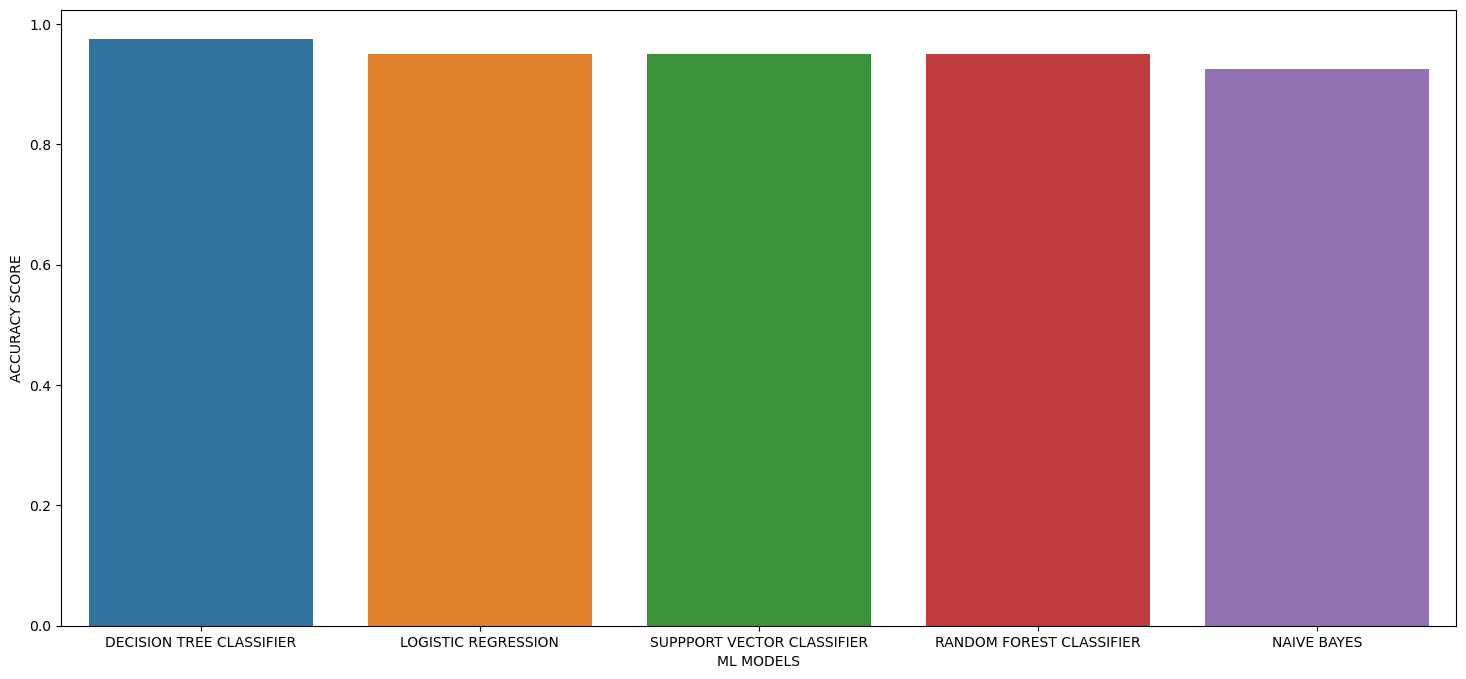

In [52]:
z = pd.DataFrame({"ML MODELS" : ["LOGISTIC REGRESSION","SUPPPORT VECTOR CLASSIFIER","DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES"],
                 "ACCURACY SCORE" : [lg_accuracy,svc_accuracy,dtc_accuracy,rfc_accuracy,nb_accuracy]})

d = z.sort_values(by="ACCURACY SCORE",ascending=False)
print(d)
plt.figure(figsize=((18,8)))
sns.barplot(x="ML MODELS",y="ACCURACY SCORE",data=d)


In [53]:
models ={"LOGISTIC REGRESSION":lg_accuracy,"SUPPPORT VECTOR CLASSIFIER":svc_accuracy,"DECISION TREE CLASSIFIER":dtc_accuracy,"RANDOM FOREST CLASSIFIER":rfc_accuracy,"NAIVE BAYES":nb_accuracy}

### **CONCLUSION**

In [54]:
print(f"The Model With Highest Accuracy Score is {max(models,key=models.get)}")

The Model With Highest Accuracy Score is DECISION TREE CLASSIFIER
